# End to End with classfying iris species

In this notebook i'm going to build a machine learning program which classify iris spaces into three different classes.

## 1. Problem definition.
We're going to classify iris species using machine learning algorithms.

## 2. Data Definition.
Data come from SciKit-Learn standard datasets called `Iris dataset`.

This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

## Meeting and Visualizing data.

In [2]:
# Import requirements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [8]:
# Import data
iris_dataset = datasets.load_iris()
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [10]:
print(iris_dataset['DESCR'][:200])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive


In [12]:
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [15]:
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [16]:
iris_dataset['data'].shape

(150, 4)

In [18]:
iris_dataset['target'].shape

(150,)

In [19]:
iris_dataset['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [25]:
# three classes: 1 : setosa, 2 : versicolor 3 : virginica
iris_dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [27]:
# splitting data into train and test
from sklearn.model_selection import train_test_split
np.random.seed(40)
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], test_size=0.25)

In [28]:
print(f'Train data shapes: X: {X_train.shape}, y: {y_train.shape}')
print(f'Test data shapes: X {X_test.shape}, y: {y_test.shape}')

Train data shapes: X: (112, 4), y: (112,)
Test data shapes: X (38, 4), y: (38,)


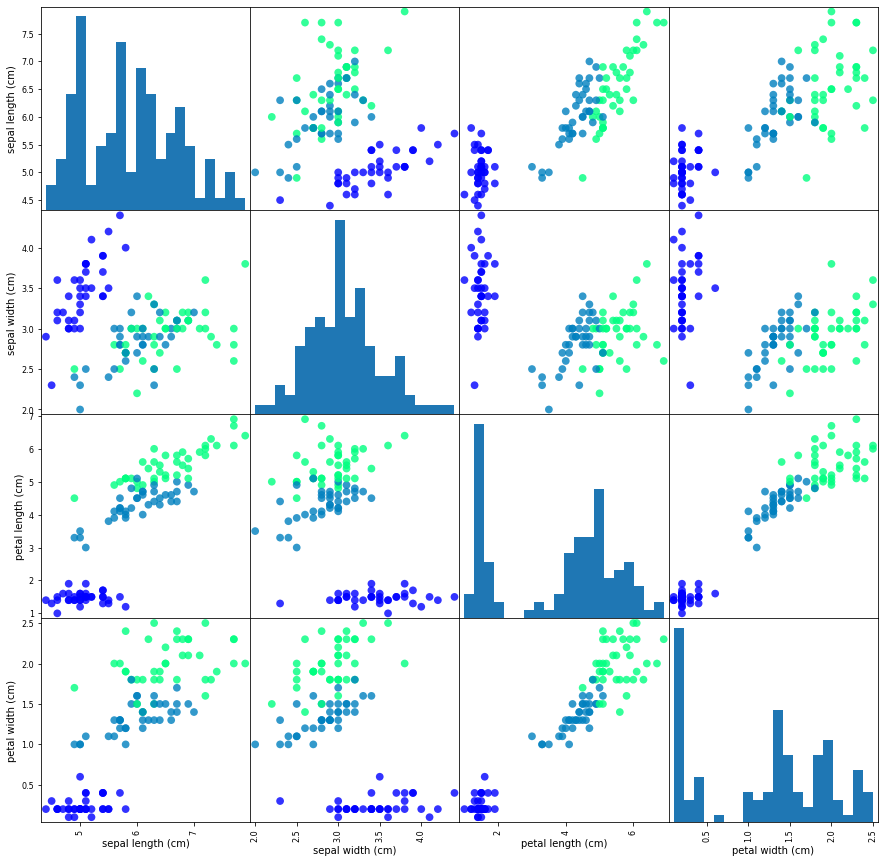

In [41]:
# Visulizing data
# create a dataframe from our training data
iris_train_df = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
iris_train_df.head()

# visualize our train data with pd.scatter_matrix
ax = pd.plotting.scatter_matrix(iris_train_df, c=y_train, figsize=(15, 15), marker='o',
                       hist_kwds={'bins': 20}, s= 60, alpha= .8, cmap='winter')

In [46]:
# Building model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
# fit the model
knn.fit(X_train, y_train);

In [49]:
# make predictions
X_new = np.array([[5, 2.9, 1, 0.2]])
X_new.shape

(1, 4)

In [50]:
preds = knn.predict(X_new)
iris_dataset['target_names'][preds]

array(['setosa'], dtype='<U10')

In [54]:
# Evaluate
y_preds = knn.predict(X_test)
print(knn.score(X_test, y_test))

1.0
